In [1]:
#Importing Libraries
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [3]:
#Reading the dataset 
data = pd.read_csv('fake_job_postings.csv')


In [8]:
#Head of the dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
#to access particular row in dataset
data.iloc[[50]]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
50,51,"Food Production Manager @ PGI, a Food Producti...","US, NV, Carson City",Production,NaN,PGI is a fast growing organic herb/spice/botan...,"November, 2014Pure Ground Ingredients (PGI)in ...",Manager role requirements- Multi-lingual (Engl...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Food & Beverages,Production,0


In [11]:
#Shape of the dataset
data.shape

(17880, 18)

In [14]:
#In the head of the dataset, we can see that missing values are present as NaN. We will check all the missing values in the replace them with blank.
data.interpolate(inplace=True)
data.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [15]:
#Delete the unnecessary columns
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

In [16]:
#Fill NaN values with blank space
data.fillna(' ', inplace=True)
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


c:\users\welcome\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,fraudulent,title
0,0,17014
1,1,866


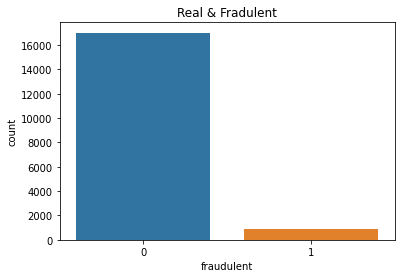

In [17]:
#Fraud and Real visualization
sns.countplot(data.fraudulent).set_title('Real & Fradulent')
data.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

Text(0.5, 0, 'Countries')

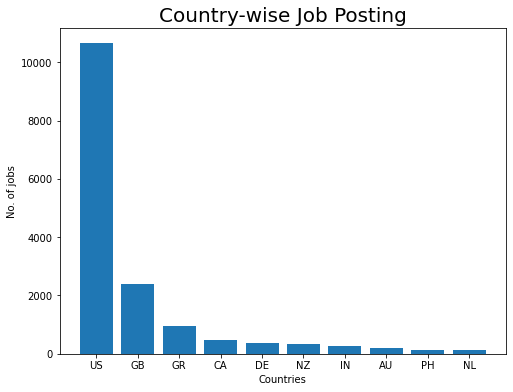

In [18]:
#Visualize job postings by countries
def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)

country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

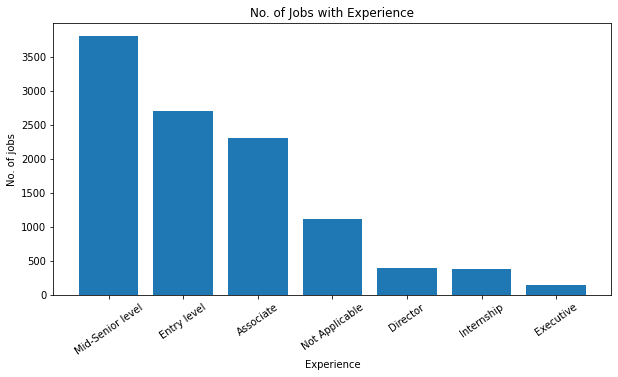

In [19]:
#Visualize the required experiences in the jobs
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [20]:
#Most frequent jobs
print(data.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [21]:
#Titles and count of fraudulent jobs
print(data[data.fraudulent==1].title.value_counts()[:10])


Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Name: title, dtype: int64


In [22]:
#Titles and count of real jobs
print(data[data.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [23]:
#In the next step, the dataset will be preprocessed for training. For this purpose, all the important text data is combined in one column and rest are deleted except the target column.
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


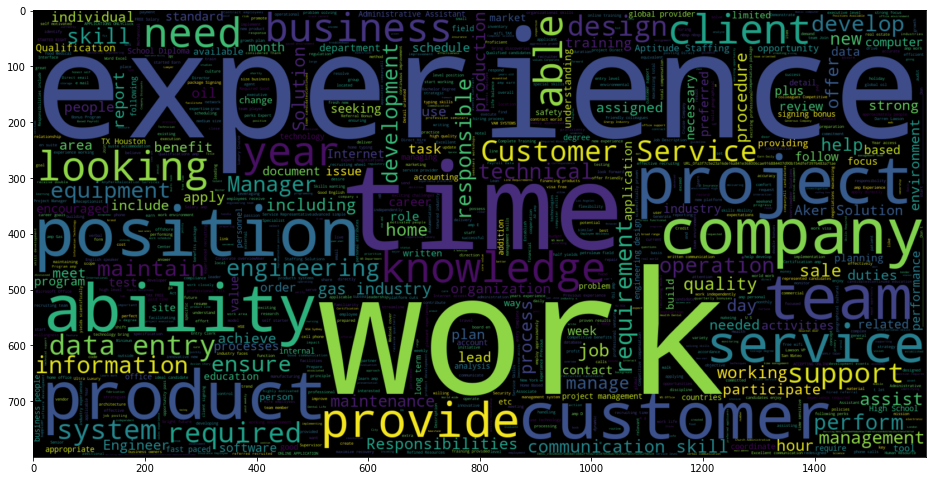

In [24]:
#Separate fraud and actual jobs
fraudjobs_text = data[data.fraudulent==1].text
actualjobs_text = data[data.fraudulent==0].text

#Fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

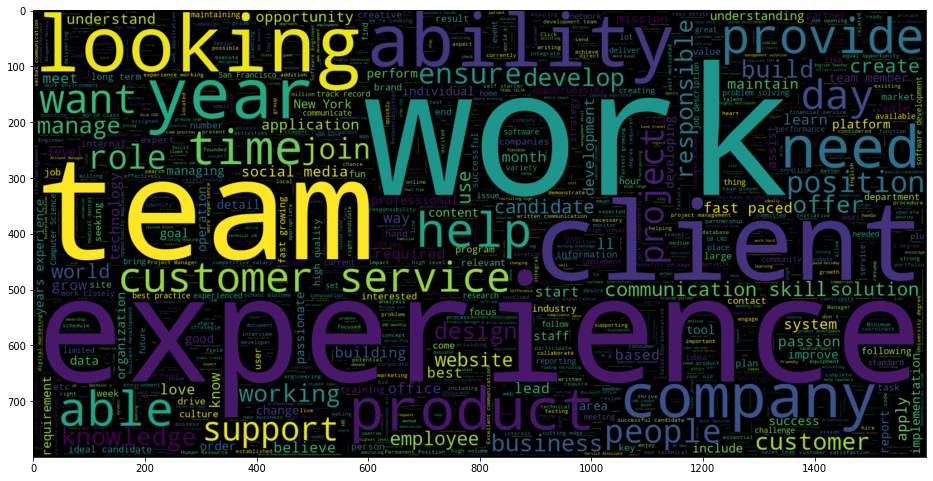

In [25]:
#Actual jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')


In [27]:
!pip install spacy && python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\users\welcome\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
2021-07-18 13:44:15.931035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-18 13:44:15.931099: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
You should consider upgrading via the 'C:\Users\welcome\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [28]:
#The dataset is cleaned and preprocessed
punctuations = string.punctuation
nlp=spacy.load("en_core_web_sm")
stop_words=spacy.lang.en.stop_words.STOP_WORDS
parser=English()
def spacy_tokenizer(sentence):
    mytokens=parser(sentence)
    mytokens=[ word.lemma_.lower().strip() if word.lemma_ !="-PRON-" else word.lower_ for word in mytokens ]
    mytockens=[ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens
class predictors(TransformerMixin):
    def transform(self ,X,**transform_parms):
        return [clean_text(text) for text in X]
    def fit(self ,X,y_None, **fit_params):
        return self
    def get_params(self,deep=True):
        return{}
def clean_text(text):
    return text.strip().lower()

In [29]:
data['text']=data['text'].apply(clean_text)

In [30]:
cv=TfidfVectorizer(max_features=100)
x=cv.fit_transform(data['text'])
data1=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
data.drop(["text"],axis=1,inplace=True)
main_data=pd.concat([data1,data],axis=1)

In [31]:
main_data.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.040922,0.000000,0.042219,0.036312,0.000000,0.751597,0.000000,0.078274,0.000000,...,0.00000,0.000000,0.185171,0.050739,0.067701,0.000000,0.000000,0.000000,0.000000,0
1,0.021899,0.094202,0.035399,0.024297,0.041796,0.029777,0.490997,0.056638,0.060062,0.052432,...,0.00000,0.078020,0.165769,0.043800,0.116886,0.099347,0.000000,0.204896,0.130479,0
2,0.000000,0.000000,0.176735,0.000000,0.041735,0.089200,0.396893,0.113110,0.000000,0.000000,...,0.00000,0.062325,0.307407,0.058315,0.000000,0.000000,0.000000,0.094429,0.074450,0
3,0.023265,0.000000,0.018803,0.000000,0.000000,0.094900,0.695482,0.000000,0.031904,0.037134,...,0.02313,0.049731,0.075474,0.046531,0.000000,0.105542,0.019805,0.050232,0.059406,0
4,0.000000,0.000000,0.067990,0.000000,0.040138,0.028596,0.606245,0.081587,0.115360,0.000000,...,0.00000,0.000000,0.159195,0.028042,0.037417,0.000000,0.035806,0.030272,0.107403,0


In [32]:
Y=main_data.iloc[:,-1]
X=main_data.iloc[:,:-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516, 100)
(12516,)
(5364, 100)
(5364,)


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,y_train)

In [34]:
print(X_test)

        ability     about       all      also       amp        an       and  \
17566  0.000000  0.000000  0.000000  0.079756  0.000000  0.048872  0.498864   
13074  0.197130  0.042399  0.031865  0.000000  0.000000  0.026804  0.463027   
5955   0.000000  0.067924  0.000000  0.000000  0.000000  0.000000  0.556338   
13728  0.132252  0.000000  0.000000  0.000000  0.000000  0.000000  0.564795   
16683  0.000000  0.000000  0.000000  0.000000  0.263427  0.046919  0.147363   
...         ...       ...       ...       ...       ...       ...       ...   
3418   0.112934  0.024290  0.073020  0.012530  0.000000  0.046068  0.651101   
7835   0.000000  0.000000  0.000000  0.042575  0.000000  0.104353  0.450658   
3606   0.113650  0.000000  0.091854  0.000000  0.072302  0.051511  0.505580   
113    0.000000  0.000000  0.000000  0.000000  0.214649  0.061170  0.552352   
13341  0.000000  0.089967  0.000000  0.046410  0.000000  0.028438  0.625231   

            are        as        at  ...      well 

In [35]:
print(y_test)

17566    1
13074    0
5955     0
13728    0
16683    0
        ..
3418     0
7835     0
3606     0
113      0
13341    0
Name: fraudulent, Length: 5364, dtype: int64


In [38]:
pred=rfc.predict(X_test)
score=accuracy_score(y_test,pred)
score

0.9694258016405667

In [39]:
print("classification Report\n")
print(classification_report(y_test,pred))
print("confusion Matrix\n")
print(confusion_matrix(y_test,pred))

classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5080
           1       1.00      0.42      0.59       284

    accuracy                           0.97      5364
   macro avg       0.98      0.71      0.79      5364
weighted avg       0.97      0.97      0.96      5364

confusion Matrix

[[5080    0]
 [ 164  120]]


In [40]:
data.head(100)

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,1


In [42]:
data.iloc[[5]]

,fraudulent
5,0
